## Daily Climate Study -- Delhi, India

In this tutorial we will analyze the daily average temperatures (degrees Celsius) in Delhi, India from 2013 to 2017. 
* Data available at https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

In [1]:
# imports

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
# read in data

df = pd.read_csv("DailyDelhiClimateTrain.csv")

In [3]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


We will focus on the `meantemp` column, and transform the date strings into Python `datetime` objects:

In [5]:
# Keep dates and temperatures

date_dict_all = {}

for val1, val2 in zip(df.date.values, df.meantemp.values):    
    day = datetime.strptime(val1.split()[0], "%Y-%m-%d")
    date_dict_all[day] = val2
            
print(len(date_dict_all))



1462


In [6]:
new_df = pd.DataFrame.from_dict(date_dict_all, orient="index", columns=["meantemp"])
# new_df.index = df.index.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meantemp  1462 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


Here is our first look at the temperature data:

<Axes: >

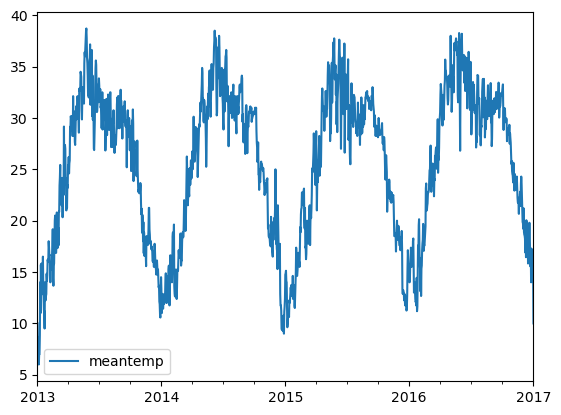

In [7]:
new_df.plot()

We will apply a "moving average" to smooth the data:
* `num_days = 7` gives us a rolling weekly average. 
* What happens if you adjust `num_days` to be lower or higher?

(5.0, 40.0)

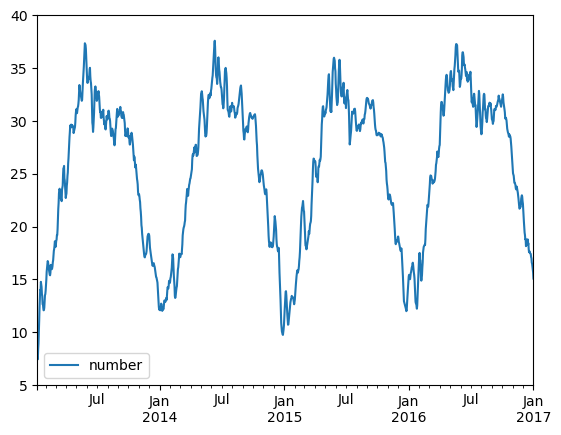

In [8]:
# Full year

avg_dict = {}
num_days = 7

keys = list(date_dict_all.keys())

for k in range(num_days - 1, len(keys)):
    cur_key = keys[k]
    avg = 0
    for i in range(num_days):
        avg += date_dict_all[keys[k-i]]
    avg /= num_days    
    avg_dict[keys[k]] = avg

new_df = pd.DataFrame.from_dict(avg_dict, orient="index", columns=["number"])
# new_df.index = df.index.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
ax = new_df.plot()
ax.set_ylim(5, 40) # Use the same axis to compare charts



We can see the data is periodic (following the changes of the seasons). What if we want to compare against years? Or against particular months?

Let's plot each year as a different line on the same graph.
* Note that 2014 and 2015 are not leap years, but 2016 is
* To make the days line up, we will use 2016 as the common timeframe (pandas will ignore the missing leap day values for 2014 and 2015)

C:\Users\10502190\AppData\Local\Temp\ipykernel_8336\190680233.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(["Jan", "Mar", "May", "Jul", "Sep", "Nov", "Jan"])


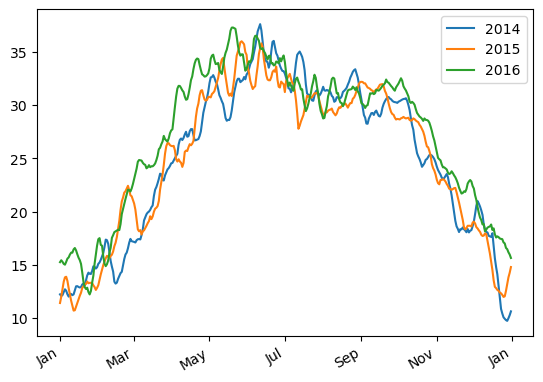

In [9]:
# Extract 2014, 2015, and 2016
# Set all years to 2016 (fixes leap year issue)

avg_dict_2014 = {datetime(2016, int(k.month), int(k.day)): avg_dict[k] for k in avg_dict if k.year == 2014}
avg_dict_2015 = {datetime(2016, k.month, k.day): avg_dict[k] for k in avg_dict if k.year == 2015}
avg_dict_2016 = {k: avg_dict[k] for k in avg_dict if k.year == 2016}


df_2014 = pd.DataFrame.from_dict(avg_dict_2014, orient="index", columns=["number"])
df_2015 = pd.DataFrame.from_dict(avg_dict_2015, orient="index", columns=["number"])
df_2016 = pd.DataFrame.from_dict(avg_dict_2016, orient="index", columns=["number"])


fig, axes = plt.subplots()
df_2014.plot(ax=axes, label="2014")
df_2015.plot(ax=axes, label="2015")
df_2016.plot(ax=axes, label="2016")

h, l = axes.get_legend_handles_labels()
axes.legend(h, ["2014", "2015", "2016"])
axes.set_xticklabels(["Jan", "Mar", "May", "Jul", "Sep", "Nov", "Jan"])
    
#plt.tight_layout()    
plt.show()


At first glace, it appears that 2016 was warmer than 2014 on average. So let's just compare 2016 against 2014: 

C:\Users\10502190\AppData\Local\Temp\ipykernel_8336\3601231784.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(["Jan", "Mar", "May", "Jul", "Sep", "Nov", "Jan"])


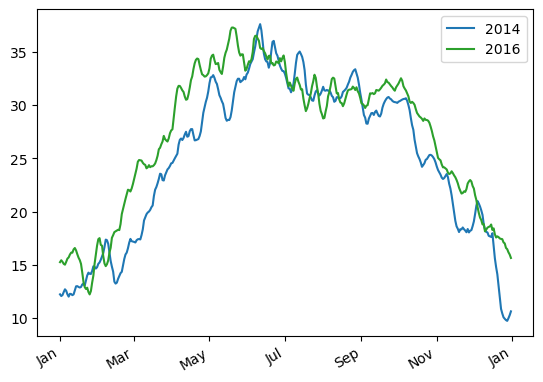

In [10]:
# Extract 2014, 2015, and 2016
# Set all years to 2016 (fixes leap year issue)

avg_dict_2014 = {datetime(2016, int(k.month), int(k.day)): avg_dict[k] for k in avg_dict if k.year == 2014}
avg_dict_2015 = {datetime(2016, k.month, k.day): avg_dict[k] for k in avg_dict if k.year == 2015}
avg_dict_2016 = {k: avg_dict[k] for k in avg_dict if k.year == 2016}


df_2014 = pd.DataFrame.from_dict(avg_dict_2014, orient="index", columns=["number"])
df_2015 = pd.DataFrame.from_dict(avg_dict_2015, orient="index", columns=["number"])
df_2016 = pd.DataFrame.from_dict(avg_dict_2016, orient="index", columns=["number"])


fig, axes = plt.subplots()
df_2014.plot(ax=axes, label="2014")
# df_2015.plot(ax=axes, label="2015")
df_2016.plot(ax=axes, label="2016", color="tab:green")

h, l = axes.get_legend_handles_labels()
axes.legend(h, ["2014", "2016"])
axes.set_xticklabels(["Jan", "Mar", "May", "Jul", "Sep", "Nov", "Jan"])
    
#plt.tight_layout()    
plt.show()


Now let's plot the difference between these two curves:

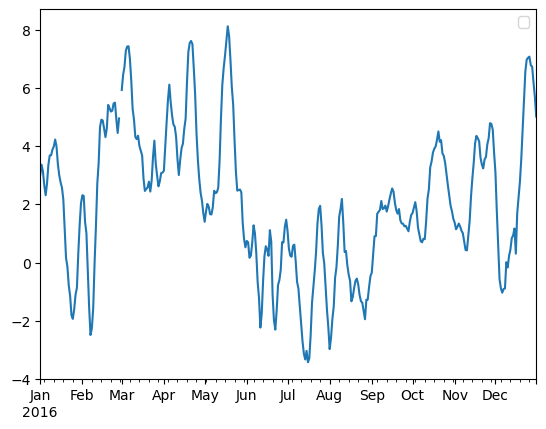

In [11]:
# Extract 2014, 2015, and 2016
# Set all years to 2016 (fixes leap year issue)

avg_dict_2014 = {datetime(2016, int(k.month), int(k.day)): avg_dict[k] for k in avg_dict if k.year == 2014}
avg_dict_2015 = {datetime(2016, k.month, k.day): avg_dict[k] for k in avg_dict if k.year == 2015}
avg_dict_2016 = {k: avg_dict[k] for k in avg_dict if k.year == 2016}


df_2014 = pd.DataFrame.from_dict(avg_dict_2014, orient="index", columns=["number"])
df_2015 = pd.DataFrame.from_dict(avg_dict_2015, orient="index", columns=["number"])
df_2016 = pd.DataFrame.from_dict(avg_dict_2016, orient="index", columns=["number"])

# Get the difference
diff_df = df_2016 - df_2014


fig, axes = plt.subplots()
diff_df.plot(ax=axes)
# h, l = axes.get_legend_handles_labels()
axes.legend([])
# axes.set_xticklabels(["Jan", "Mar", "May", "Jul", "Sep", "Nov", "Jan"])
    
#plt.tight_layout()    
plt.show()


We do get a gap on leap day (present in 2016, but not in 2014). Let's redo the dataframe to use 2014 as the base year:
* We will just remove leap day from 2016 and call it good!

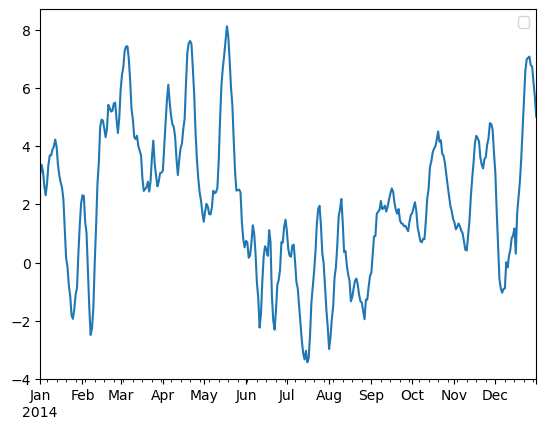

In [20]:
avg_dict_2014 = {k: avg_dict[k] for k in avg_dict if k.year == 2014}
avg_dict_2016 = {datetime(2014, int(k.month), int(k.day)): avg_dict[k] for k in avg_dict if (k.year == 2016) and not (int(k.month) ==2 and (int(k.day) == 29))}

df_2014 = pd.DataFrame.from_dict(avg_dict_2014, orient="index", columns=["number"])
df_2016 = pd.DataFrame.from_dict(avg_dict_2016, orient="index", columns=["number"])

# Get the difference
diff_df = df_2016 - df_2014

fig, axes = plt.subplots()
diff_df.plot(ax=axes)
# h, l = axes.get_legend_handles_labels()
axes.legend([])
# axes.set_xticklabels(["Jan", "Mar", "May", "Jul", "Sep", "Nov", "Jan"])
    
#plt.tight_layout()    
plt.show()


Now let's add the x-axis at 0 to show the days when 2014 was warmer:
* And remove the "2014" that shows up on the dates
* And remove the minor tick marks along the x-axis

C:\Users\10502190\AppData\Local\Temp\ipykernel_8336\1201120365.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(x_labels)


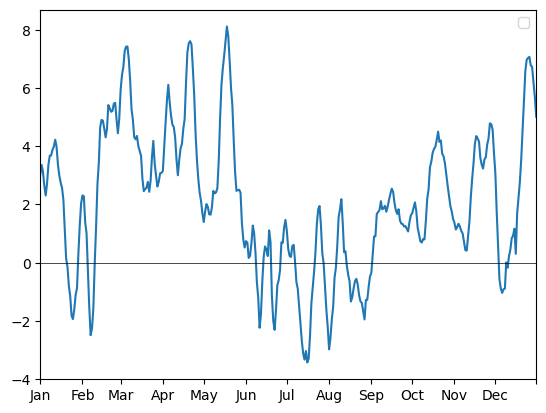

In [21]:
fig, axes = plt.subplots()
diff_df.plot(ax=axes)
axes.legend([])

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html
axes.axhline(0, 0, 1, color="black", linewidth="0.5")
x_labels = axes.get_xticklabels()
x_labels[0] = matplotlib.text.Text(16801, 0, 'Jan') # resetting label on first value
axes.set_xticklabels(x_labels)
axes.minorticks_off() # remove small tick marks
    
plt.show()


Now let's add in a title and unit labels:

C:\Users\10502190\AppData\Local\Temp\ipykernel_8336\1346367486.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(x_labels)


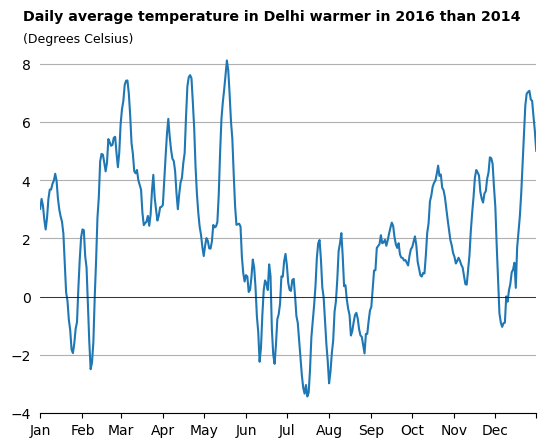

In [30]:
fig, axes = plt.subplots()
diff_df.plot(ax=axes)
axes.get_legend().remove()

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html
axes.axhline(0, 0, 1, color="black", linewidth="0.5")
x_labels = axes.get_xticklabels()
x_labels[0] = matplotlib.text.Text(16801, 0, 'Jan') # resetting label on first value
axes.set_xticklabels(x_labels)
axes.minorticks_off() # remove small tick marks

# Grid
axes.grid(visible=True, axis="y")

# Edges
axes.spines[["top", "right", "left"]].set_visible(False)


# Title
axes.text(16058, 9.5, "Daily average temperature in Delhi warmer in 2016 than 2014", fontsize = 10.2, fontweight = "bold")

# Units
axes.text(16058, 8.75, "(Degrees Celsius)", fontsize = 9)

plt.tick_params(left= False) # remove ticks on y-axis

    
plt.show()


Since we are comparing one year against another, there is no need for the final tickmark on the x-axis. It's a little distracting since it is not labeled!

C:\Users\10502190\AppData\Local\Temp\ipykernel_8336\209617583.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(x_labels)


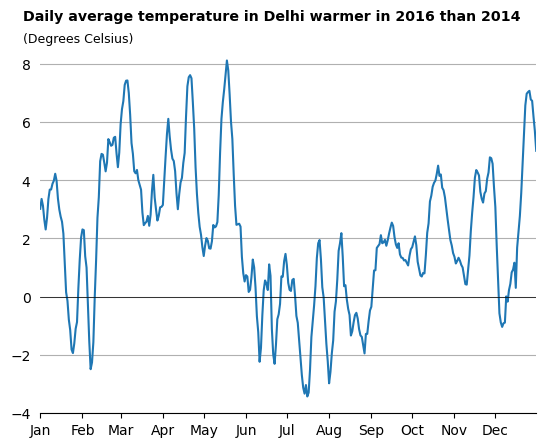

In [31]:
fig, axes = plt.subplots()
diff_df.plot(ax=axes)
axes.get_legend().remove()

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html
axes.axhline(0, 0, 1, color="black", linewidth="0.5")
x_labels = axes.get_xticklabels()
x_labels[0] = matplotlib.text.Text(16801, 0, 'Jan') # resetting label on first value
axes.set_xticklabels(x_labels)
axes.minorticks_off() # remove small tick marks

# Remove final x tick mark
x_ticks = axes.get_xticks()
axes.set_xticks(x_ticks[:-1])

# Grid
axes.grid(visible=True, axis="y")

# Edges
axes.spines[["top", "right", "left"]].set_visible(False)

# Title
axes.text(16058, 9.5, "Daily average temperature in Delhi warmer in 2016 than 2014", fontsize = 10.2, fontweight = "bold")

# Units
axes.text(16058, 8.75, "(Degrees Celsius)", fontsize = 9)

plt.tick_params(left= False) # remove ticks on y-axis

plt.show()


To give the graph more weight, we can try filling in the area between the curve an the 0 line on the x-axis:

C:\Users\10502190\AppData\Local\Temp\ipykernel_8336\2295655645.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(x_labels)


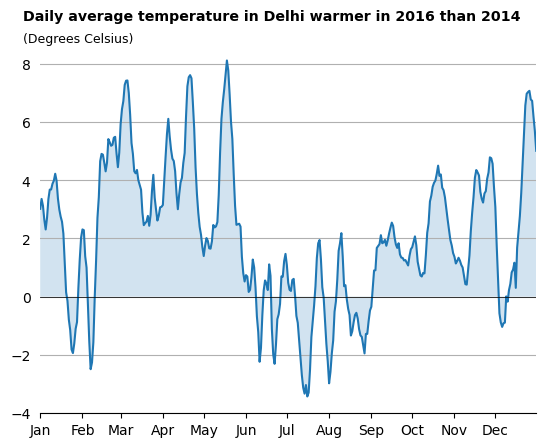

In [33]:
fig, axes = plt.subplots()
diff_df.plot(ax=axes)
axes.get_legend().remove()

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html
axes.axhline(0, 0, 1, color="black", linewidth="0.5")
x_labels = axes.get_xticklabels()
x_labels[0] = matplotlib.text.Text(16801, 0, 'Jan') # resetting label on first value
axes.set_xticklabels(x_labels)
axes.minorticks_off() # remove small tick marks

# Line shading
axes.fill_between(diff_df.index, diff_df.number, alpha=0.2)


# Remove final x tick mark
x_ticks = axes.get_xticks()
axes.set_xticks(x_ticks[:-1])

# Grid
axes.grid(visible=True, axis="y")

# Edges
axes.spines[["top", "right", "left"]].set_visible(False)

# Title
axes.text(16058, 9.5, "Daily average temperature in Delhi warmer in 2016 than 2014", fontsize = 10.2, fontweight = "bold")

# Units
axes.text(16058, 8.75, "(Degrees Celsius)", fontsize = 9)

plt.tick_params(left= False) # remove ticks on y-axis

plt.show()


Other things we might do with the temperature data includes focusing on a specific time interval:

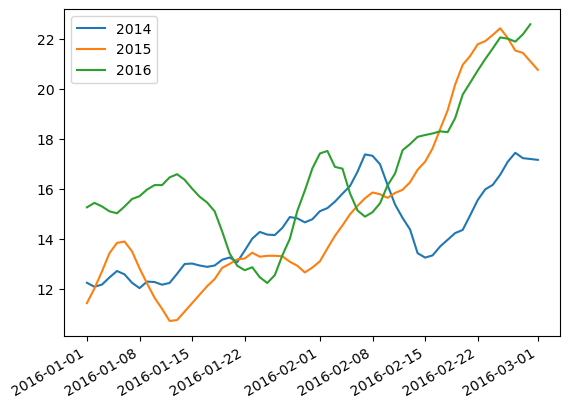

In [15]:
# Extract 2014, 2015, and 2016
# Set all years to 2016 (fixes leap year issue)
# Just January and February

avg_dict_2014 = {datetime(2016, int(k.month), int(k.day)): avg_dict[k] for k in avg_dict if k.year == 2014}
avg_dict_2015 = {datetime(2016, k.month, k.day): avg_dict[k] for k in avg_dict if k.year == 2015}
avg_dict_2016 = {k: avg_dict[k] for k in avg_dict if k.year == 2016}


df_2014 = pd.DataFrame.from_dict(avg_dict_2014, orient="index", columns=["number"])
df_2015 = pd.DataFrame.from_dict(avg_dict_2015, orient="index", columns=["number"])
df_2016 = pd.DataFrame.from_dict(avg_dict_2016, orient="index", columns=["number"])


fig, axes = plt.subplots()
df_2014.iloc[:60].plot(ax=axes, label="2014")
df_2015.iloc[:60].plot(ax=axes, label="2015")
df_2016.iloc[:60].plot(ax=axes, label="2016")

h, l = axes.get_legend_handles_labels()
axes.legend(h, ["2014", "2015", "2016"])
# axes.set_xticklabels(["Jan", "Mar", "May", "Jul", "Sep", "Nov", "Jan"])
    
#plt.tight_layout()    
plt.show()


Or we can break each year into its own chart and create a small multiples graph:

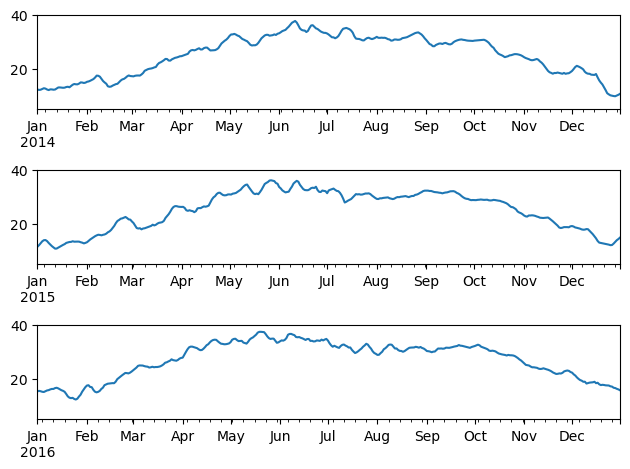

In [16]:
# Extract 2014, 2015, and 2016

avg_dict_2014 = {k: avg_dict[k] for k in avg_dict if k.year == 2014}
avg_dict_2015 = {k: avg_dict[k] for k in avg_dict if k.year == 2015}
avg_dict_2016 = {k: avg_dict[k] for k in avg_dict if k.year == 2016}


df_2014 = pd.DataFrame.from_dict(avg_dict_2014, orient="index", columns=["number"])
df_2015 = pd.DataFrame.from_dict(avg_dict_2015, orient="index", columns=["number"])
df_2016 = pd.DataFrame.from_dict(avg_dict_2016, orient="index", columns=["number"])


fig, axes = plt.subplots(nrows=3, ncols=1)
df_2014.plot(ax=axes[0])
df_2015.plot(ax=axes[1])
df_2016.plot(ax=axes[2])

for i in range(3):
    axes[i].set_ylim(5, 40) # Use the same axis to compare charts
    axes[i].get_legend().remove() # supress legend
    
plt.tight_layout()    
plt.show()